# 3. Modelling

## 3.1 Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
import pickle
from Classification import Classification
from Ensemble import Ensemble

In [2]:
x_train = pd.read_csv('3.x_train_data.csv')
y_train = pd.read_csv('3.y_train_data.csv')

In [3]:
print(x_train.shape)
print(y_train.shape)

(7524, 174)
(7524, 1)


## 3.2 Train and Validation Split

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['score'],test_size=.25,random_state=42)

In [5]:
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

## 3.3 Decision Tree (Baseline)

### 3.3.1 1st Attempt

In [6]:
params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,4,5,6,7,8,9]}

In [7]:
dec_tree_1 = Classification('Decision Tree',x_train,x_val,y_train,y_val)

In [8]:
dec_tree_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.41042,0.359915,0.050505


The best hyperparameters are:  {'max_depth': 9, 'min_samples_leaf': 10} 



,1,2,3,4,5
precision,0.509158,0.271462,0.256410,0.353175,0.517751
recall,0.364829,0.606218,0.106383,0.248603,0.460526
f1-score,0.425076,0.375000,0.150376,0.291803,0.487465


### 3.3.2 2nd Attempt

In [9]:
params = {'min_samples_leaf':[3,4,5],
          'max_depth':[7,8,9,10]}

In [10]:
dec_tree_2 = Classification('Decision Tree',x_train,x_val,y_train,y_val)

In [11]:
dec_tree_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.434343,0.367358,0.066986


The best hyperparameters are:  {'max_depth': 10, 'min_samples_leaf': 5} 



,1,2,3,4,5
precision,0.511111,0.277193,0.308176,0.371747,0.509146
recall,0.362205,0.613990,0.130319,0.279330,0.439474
f1-score,0.423963,0.381950,0.183178,0.318979,0.471751


## 3.4 Random Forest

### 3.4.1 1st Attempt

In [12]:
params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,5,7,9,11,13,15]}

In [13]:
ran_for_1 = Classification('Random Forest',x_train,x_val,y_train,y_val)

In [14]:
ran_for_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.581428,0.452419,0.129009


The best hyperparameters are:  {'max_depth': 13, 'min_samples_leaf': 10} 



,1,2,3,4,5
precision,0.470796,0.425993,0.370079,0.396783,0.546117
recall,0.698163,0.305699,0.250000,0.413408,0.592105
f1-score,0.562368,0.355958,0.298413,0.404925,0.568182


### 3.4.2 2nd Attempt

In [15]:
params = {'min_samples_leaf':[7,8,9,10,11,12,13,14],
          'max_depth':[13,14,15,16,17,18]}

In [16]:
ran_for_2 = Classification('Random Forest',x_train,x_val,y_train,y_val)

In [17]:
ran_for_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.63849,0.452951,0.18554


The best hyperparameters are:  {'max_depth': 18, 'min_samples_leaf': 8} 



,1,2,3,4,5
precision,0.495238,0.396721,0.389892,0.404494,0.523923
recall,0.682415,0.313472,0.287234,0.402235,0.576316
f1-score,0.573951,0.350217,0.330781,0.403361,0.548872


### 3.4.3 3rd Attempt

In [18]:
params = {'min_samples_leaf':[7,8,9,10,11,12,13,14],
          'max_depth':[17,18,19,20,21,22]}

In [19]:
ran_for_3 = Classification('Random Forest',x_train,x_val,y_train,y_val)

In [20]:
ran_for_3.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.65373,0.463583,0.190147


The best hyperparameters are:  {'max_depth': 20, 'min_samples_leaf': 8} 



,1,2,3,4,5
precision,0.492674,0.434783,0.371429,0.422222,0.541766
recall,0.706037,0.310881,0.276596,0.424581,0.597368
f1-score,0.580367,0.362538,0.317073,0.423398,0.568210


## 3.5 Logistic Regression

### 3.5.1 1st Attempt

In [21]:
params = {'penalty':['l1','l2'],
          'C':[0.01,0.05,0.1,0.5,1,5,10]}

In [22]:
log_reg_1 = Classification('Logistic Regression',x_train,x_val,y_train,y_val)

In [23]:
log_reg_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.570618,0.511962,0.058657


The best hyperparameters are:  {'C': 0.5, 'penalty': 'l2'} 



,1,2,3,4,5
precision,0.544118,0.453608,0.451713,0.480447,0.610837
recall,0.582677,0.455959,0.385638,0.480447,0.652632
f1-score,0.562738,0.454780,0.416069,0.480447,0.631043


### 3.5.2 2nd Attempt

In [24]:
params = {'penalty':['l1','l2'],
          'C':[0.3,0.4,0.5,0.6,0,7]}

In [25]:
log_reg_2 = Classification('Logistic Regression',x_train,x_val,y_train,y_val)

In [26]:
log_reg_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.571859,0.510898,0.06096


The best hyperparameters are:  {'C': 0.6, 'penalty': 'l2'} 



,1,2,3,4,5
precision,0.541667,0.453846,0.455975,0.476190,0.607843
recall,0.580052,0.458549,0.385638,0.474860,0.652632
f1-score,0.560203,0.456186,0.417867,0.475524,0.629442


## 3.6 Support Vector Machines

### 3.6.1 1st Attempt

In [27]:
params = {'kernel':['poly'],
          'degree':[2,3]}

In [28]:
svm_1 = Classification('SVM',x_train,x_val,y_train,y_val)

In [29]:
svm_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,SVM,0.848308,0.503456,0.344852


The best hyperparameters are:  {'degree': 2, 'kernel': 'poly'} 



,1,2,3,4,5
precision,0.537611,0.430318,0.433544,0.474843,0.621762
recall,0.637795,0.455959,0.364362,0.421788,0.631579
f1-score,0.583433,0.442767,0.395954,0.446746,0.626632


### 3.6.2 2nd Attempt

In [30]:
params = {'C':[0.1,0.5,1,5],
          'kernel':['linear'],
          'gamma':['scale','auto']}

In [31]:
svm_2 = Classification('SVM',x_train,x_val,y_train,y_val)

In [32]:
svm_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,SVM,0.553961,0.510898,0.043062


The best hyperparameters are:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} 



,1,2,3,4,5
precision,0.564171,0.424547,0.465455,0.487106,0.624352
recall,0.553806,0.546632,0.340426,0.474860,0.634211
f1-score,0.558940,0.477916,0.393241,0.480905,0.629243


### 3.6.3 3rd Attempt

In [33]:
params = {'C':[00.08,0.09,0.1,0.11,0.12],
          'kernel':['linear'],
          'gamma':['scale']}

In [34]:
svm_3 = Classification('SVM',x_train,x_val,y_train,y_val)

In [35]:
svm_3.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,SVM,0.555556,0.510898,0.044657


The best hyperparameters are:  {'C': 0.11, 'gamma': 'scale', 'kernel': 'linear'} 



,1,2,3,4,5
precision,0.569191,0.427105,0.470588,0.479769,0.613232
recall,0.572178,0.538860,0.340426,0.463687,0.634211
f1-score,0.570681,0.476518,0.395062,0.471591,0.623545


## 3.7 Guassian Naive Bayes

In [36]:
gnb_1 = Classification('Naive Bayes',x_train,x_val,y_train,y_val)

In [37]:
gnb_1.get_scores({},skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Naive Bayes,0.408471,0.399256,0.009215


,1,2,3,4,5
precision,0.515152,0.516129,0.626667,0.239316,0.333645
recall,0.669291,0.165803,0.125000,0.078212,0.939474
f1-score,0.582192,0.250980,0.208426,0.117895,0.492414


## 3.8 KNN

In [38]:
params = {}

In [39]:
knn = Classification('KNN',x_train,x_val,y_train,y_val)

In [40]:
knn.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.606769,0.413078,0.193691


,1,2,3,4,5
precision,0.436735,0.377709,0.311947,0.413897,0.571930
recall,0.561680,0.316062,0.375000,0.382682,0.428947
f1-score,0.491389,0.344147,0.340580,0.397678,0.490226


## 3.9 Adaboost (Logistic Regression)

In [41]:
adaboost = Ensemble('AdaBoost',log_reg_1.best_model,x_train,x_val,y_train,y_val)

In [42]:
adaboost.get_scores({},skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,AdaBoost,0.507,0.483254,0.023746


,1,2,3,4,5
precision,0.569892,0.419847,0.411585,0.407692,0.597990
recall,0.556430,0.427461,0.359043,0.444134,0.626316
f1-score,0.563081,0.423620,0.383523,0.425134,0.611825


## 3.10 XGBoost (Logistic Regression)

In [43]:
xgboost = Ensemble('XGBoost',log_reg_1.best_model,x_train,x_val,y_train,y_val)

In [44]:
xgboost.get_scores({},skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,XGBoost,0.957292,0.469963,0.487329


,1,2,3,4,5
precision,0.527363,0.403553,0.416413,0.402632,0.593085
recall,0.556430,0.411917,0.364362,0.427374,0.586842
f1-score,0.541507,0.407692,0.388652,0.414634,0.589947


## 3.11 Voting (Adaboost(Logistic Regression)/XGBoost(Logistic Regression))

In [45]:
adaboost_best = ('ada_dtree', adaboost.best_model)
xgboost_best = ('xgb', xgboost.best_model)

estimators = [adaboost_best,xgboost_best]

In [46]:
voting = Ensemble('Voting',estimators,x_train,x_val,y_train,y_val)

In [47]:
voting.get_scores({},skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Voting,0.956406,0.476342,0.480064


,1,2,3,4,5
precision,0.536341,0.408629,0.422492,0.408269,0.602151
recall,0.561680,0.417098,0.369681,0.441341,0.589474
f1-score,0.548718,0.412821,0.394326,0.424161,0.595745


## 3.12 Stacking (Adaboost(Logistic Regression)/XGBoost(Logistic Regression))

In [53]:
adaboost_best = ('ada_dtree', adaboost.best_model)
xgboost_best = ('xgb', xgboost.best_model)

estimators = [adaboost_best,xgboost_best]

In [54]:
stacking = Ensemble('Stacking',estimators,x_train,x_val,y_train,y_val)

In [55]:
stacking.get_scores({},skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Stacking,0.892079,0.493355,0.398724


,1,2,3,4,5
precision,0.556604,0.435967,0.415254,0.429688,0.625000
recall,0.619423,0.414508,0.390957,0.460894,0.578947
f1-score,0.586335,0.424967,0.402740,0.444744,0.601093


## 3.12 All Models Compared

In [56]:
all_models = pd.concat([dec_tree_2.scores_table,
                       ran_for_3.scores_table,
                       log_reg_1.scores_table,
                       svm_3.scores_table,
                       gnb_1.scores_table,
                       knn.scores_table,
                       adaboost.scores_table,
                       xgboost.scores_table,
                       voting.scores_table,
                       stacking.scores_table],
                       axis=0)

In [57]:
all_models

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.434343,0.367358,0.066986
0,Random Forest,0.653730,0.463583,0.190147
0,Logistic Regression,0.570618,0.511962,0.058657
0,SVM,0.555556,0.510898,0.044657
0,Naive Bayes,0.408471,0.399256,0.009215
0,KNN,0.606769,0.413078,0.193691
0,AdaBoost,0.507000,0.483254,0.023746
0,XGBoost,0.957292,0.469963,0.487329
0,Voting,0.956406,0.476342,0.480064
0,Stacking,0.892079,0.493355,0.398724


## 3.14 Best Model (Logistic Regression) - Deeper Look

In [65]:
params = {'C': [0.5], 'penalty': ['l2']}

In [66]:
log_reg_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.570618,0.511962,0.058657


The best hyperparameters are:  {'C': 0.5, 'penalty': 'l2'} 



,1,2,3,4,5
precision,0.544118,0.453608,0.451713,0.480447,0.610837
recall,0.582677,0.455959,0.385638,0.480447,0.652632
f1-score,0.562738,0.454780,0.416069,0.480447,0.631043


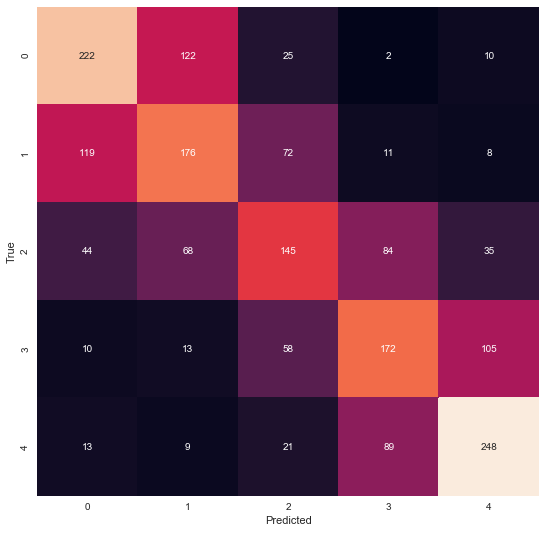

In [67]:
log_reg_1.conf_matrix()

## 3.15 Saving Best Model

In [69]:
pickle.dump(log_reg_1.best_model, open('best_model.pkl', 'wb'))